# Import

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Load data

In [2]:
path_train = '../data/Ghouls_Goblins_and Ghosts_Boo/train.csv'
path_test = '../data/Ghouls_Goblins_and Ghosts_Boo/test.csv'
df = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# Data explo

In [3]:
df.shape

(371, 7)

In [4]:
df_test.shape

(529, 6)

In [5]:
df.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [6]:
df['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

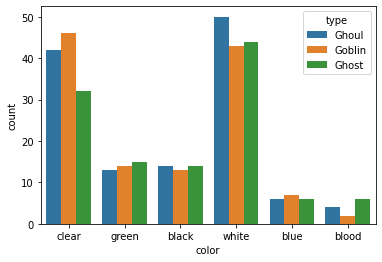

In [225]:
sns.countplot(x=df['color'], hue=df['type']);

# Preprocess

## define X and y

In [7]:
y = df['type']
X = df.drop(columns='type')

## encode target

In [8]:
labelencoder = LabelEncoder()
y =labelencoder.fit_transform(y)
y

array([1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0,

## encode color

In [9]:
df['color'].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [10]:
one = OneHotEncoder(sparse=False)
color_encoded = one.fit_transform(X[['color']])
color_encoded

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [11]:
X["black"],X["blood"],X["blue"], X["clear"],X["green"],X["white"]= color_encoded.T

In [12]:
X = X.drop(columns=['color', 'id'])

In [186]:
X_without_color = X.drop(columns=['black', 'blood', 'blue', 'clear', 'green', 'white'])
X_train_without_color, X_test_without_color, y_train_without_color, y_test_without_color = train_test_split(X_without_color, y, test_size=0.2, random_state=0)
X_train_without_color

,bone_length,rotting_flesh,hair_length,has_soul
63,0.490988,0.545145,0.492527,0.302301
284,0.761355,0.331480,0.861060,0.735897
260,0.385219,0.712220,0.391880,0.417344
320,0.342585,0.261752,0.582865,0.510331
248,0.200753,0.277945,0.568534,0.556149
...,...,...,...,...
323,0.413576,0.356863,0.658540,0.464002
192,0.681615,0.529227,0.625242,0.615308
117,0.453869,0.259701,0.581400,0.567843
47,0.268141,0.665224,0.234944,0.321623


In [13]:
X.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,0.354512,0.350839,0.465761,0.781142,0.0,0.0,0.0,1.0,0.0,0.0
1,0.575560,0.425868,0.531401,0.439899,0.0,0.0,0.0,0.0,1.0,0.0
2,0.467875,0.354330,0.811616,0.791225,1.0,0.0,0.0,0.0,0.0,0.0
3,0.776652,0.508723,0.636766,0.884464,1.0,0.0,0.0,0.0,0.0,0.0
4,0.566117,0.875862,0.418594,0.636438,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [164]:
df_full_encoded = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['target'])], axis = 1)
df_full_encoded.head()

,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white,target
0,0.354512,0.350839,0.465761,0.781142,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.575560,0.425868,0.531401,0.439899,0.0,0.0,0.0,0.0,1.0,0.0,2
2,0.467875,0.354330,0.811616,0.791225,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.776652,0.508723,0.636766,0.884464,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.566117,0.875862,0.418594,0.636438,0.0,0.0,0.0,0.0,1.0,0.0,0


<AxesSubplot:>

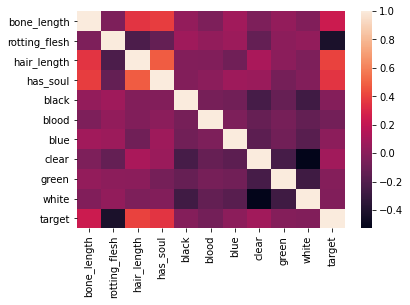

In [167]:
sns.heatmap(df_full_encoded.corr())

<AxesSubplot:ylabel='has_soul'>

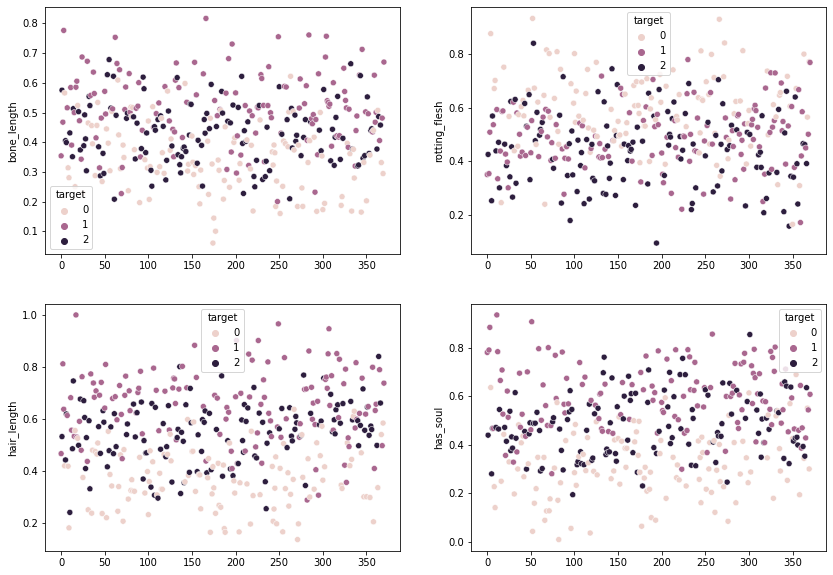

In [230]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(x=[i for i in range(0,371)], y='bone_length', data= df_full_encoded, hue='target')
plt.subplot(2,2,2)
sns.scatterplot(x=[i for i in range(0,371)], y='rotting_flesh', data= df_full_encoded, hue='target')
plt.subplot(2,2,3)
sns.scatterplot(x=[i for i in range(0,371)], y='hair_length', data= df_full_encoded, hue='target')
plt.subplot(2,2,4)
sns.scatterplot(x=[i for i in range(0,371)], y='has_soul', data= df_full_encoded, hue='target')

In [180]:
df_full_encoded['blood'].value_counts()

0.0    359
1.0     12
Name: blood, dtype: int64

# Model_1 : KNN

In [14]:
baseline = 1/3
baseline

0.3333333333333333

In [207]:
neigh = KNeighborsClassifier(n_neighbors=10)
results = cross_validate(neigh, X_train_without_color, y_train_without_color, cv=10, scoring='accuracy')
results['test_score'].mean()

0.7220689655172413

# Random forest

In [203]:
clf = RandomForestClassifier(max_depth=2)
results_clf = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')

In [204]:
results_clf['test_score'].mean()

0.6891525423728814

In [214]:
clf = RandomForestClassifier()
# Hyperparameter Grid
grid = {'n_estimators': [i for i in range(10, 50,3)], 'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [i for i in range(2, 30, 2)]}

# Instanciate Grid Search
search = GridSearchCV(clf, grid, scoring = 'accuracy', cv = 5,
                      n_jobs=-1 # paralellize computation
                     )
# Fit data to Grid Search
search.fit(X_train_without_color,y_train_without_color)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28],
                         'n_estimators': [10, 13, 16, 19, 22, 25, 28, 31, 34,
                                          37, 40, 43, 46, 49]},
             scoring='accuracy')

In [215]:
# Best score
print(search.best_score_)

# Best Params
print(search.best_params_)

# Best estimator
search.best_estimator_

0.7432203389830508
{'max_depth': 16, 'min_samples_split': 20, 'n_estimators': 43}


RandomForestClassifier(max_depth=16, min_samples_split=20, n_estimators=43)

# SVC

In [58]:
svc = SVC(kernel='linear', C=10)
results_svc = cross_validate(svc, X, y, cv=5, scoring='accuracy')
results_svc['test_score'].mean()

0.725081081081081

In [187]:
svc = SVC()
# Hyperparameter Grid
grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': np.linspace(0.01, 100, 2000)}

# Instanciate Grid Search
search = GridSearchCV(svc, grid, scoring = 'accuracy', cv = 5,
                      n_jobs=-1 # paralellize computation
                     )
# Fit data to Grid Search
search.fit(X_train_without_color,y_train_without_color)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.0000000e-02, 6.0020010e-02, 1.1004002e-01, ..., 9.9899960e+01,
       9.9949980e+01, 1.0000000e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [189]:
# Best score
print(search.best_score_)

# Best Params
print(search.best_params_)

# Best estimator
search.best_estimator_

0.7397740112994351
{'C': 0.21008004002001002, 'kernel': 'rbf'}


SVC(C=0.21008004002001002)

# XGBOOST

In [107]:
xgb = XGBClassifier()

In [108]:
results_xgb = cross_validate(xgb, X, y, cv=5, scoring='accuracy')
results_xgb['test_score'].mean()

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/maxim

[19:37:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6765045045045046

# Adaboost

# Stacking

In [218]:
ensemble = StackingClassifier(estimators = [("rf", RandomForestClassifier(max_depth= 16, min_samples_split= 20, n_estimators= 43)), ("lr", SVC(kernel='rbf', C=0.210))],
                             final_estimator = LogisticRegression()) # to equally weight forest and logreg in the vote
                           

res = cross_val_score(ensemble, X_train_without_color, y_train_without_color, scoring='accuracy', cv=10)
res.mean()

0.7122988505747126